# Titanic Case Study
Kebila Anns Subi--
25.10.2023

Step 1: Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Step 2: Reading the data

In [72]:
titanic = pd.read_csv("C:/Users/Smile/OneDrive/Documents/Python Scripts/ML/titanic.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Step 3: Data Exploration

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
titanic.shape

(891, 12)

In [75]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
# seperate the data into numeric and categorical
titanic_num = titanic[['Age','SibSp','Parch','Fare']]
titanic_cat = titanic[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

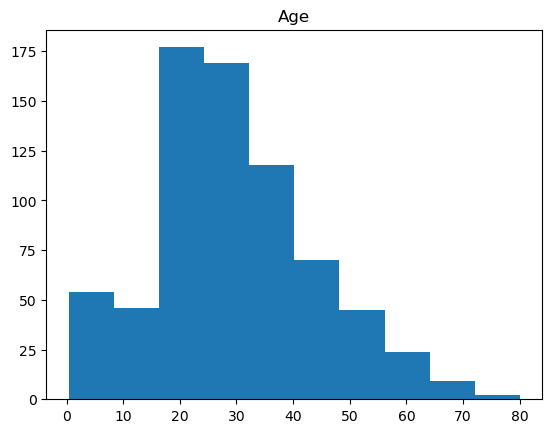

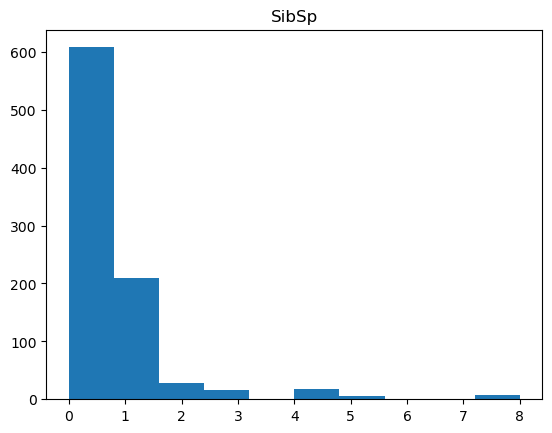

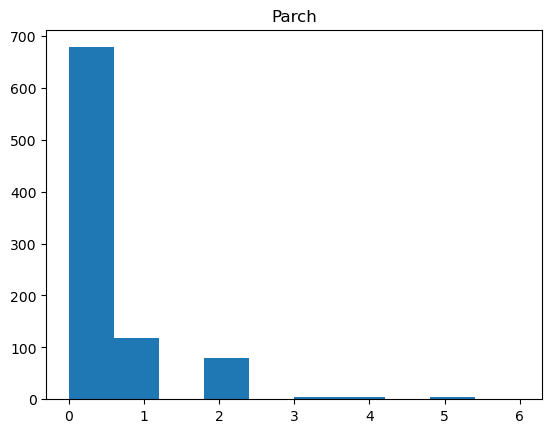

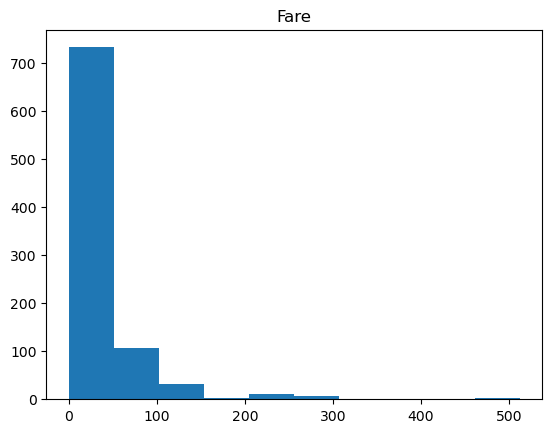

In [47]:
for i in titanic_num.columns:
    plt.hist(titanic_num[i])
    plt.title(i)
    plt.show()


<Axes: >

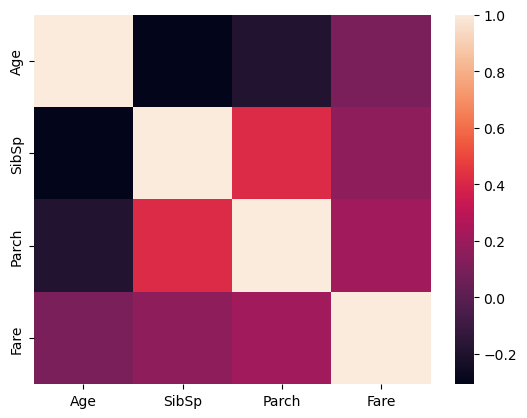

In [77]:
sns.heatmap(titanic_num.corr())

In [78]:
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


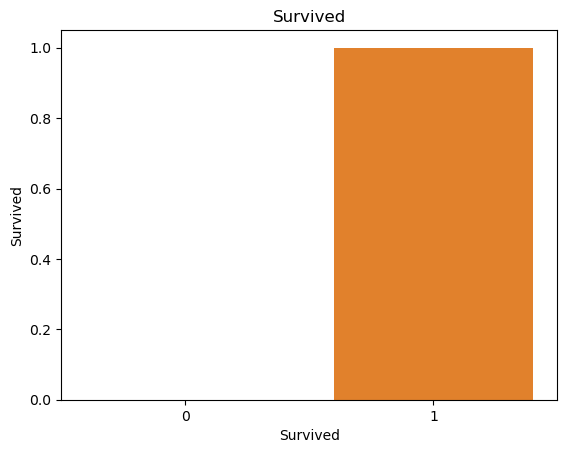

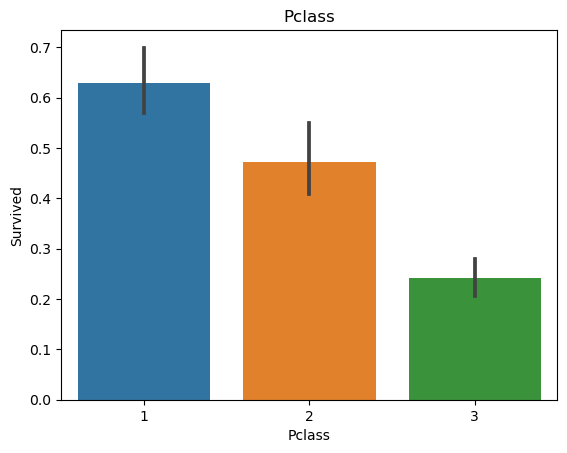

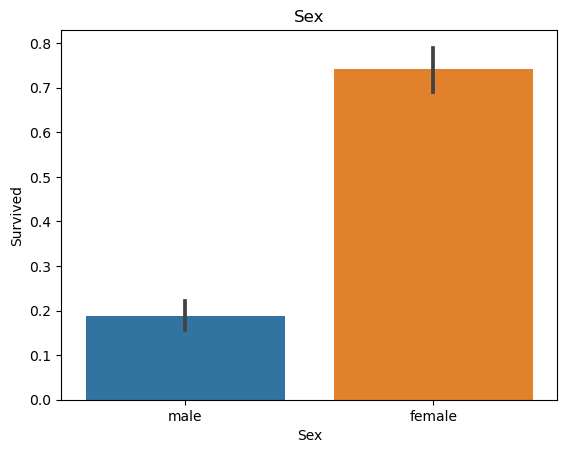

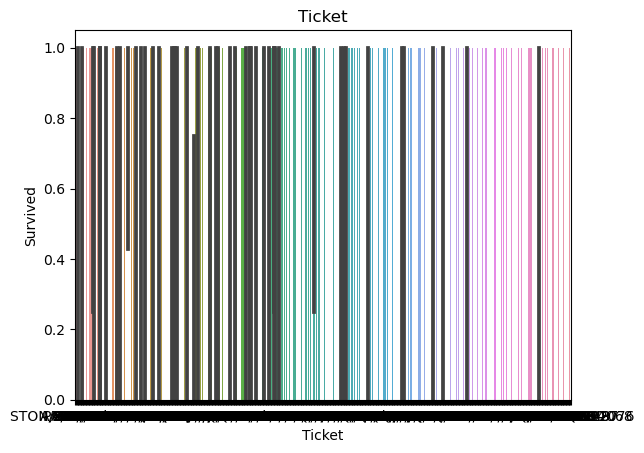

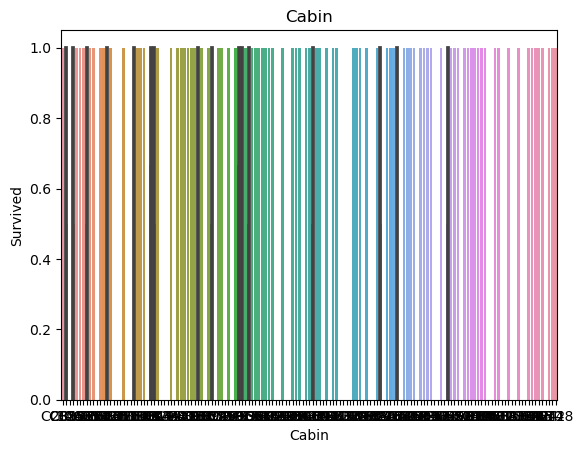

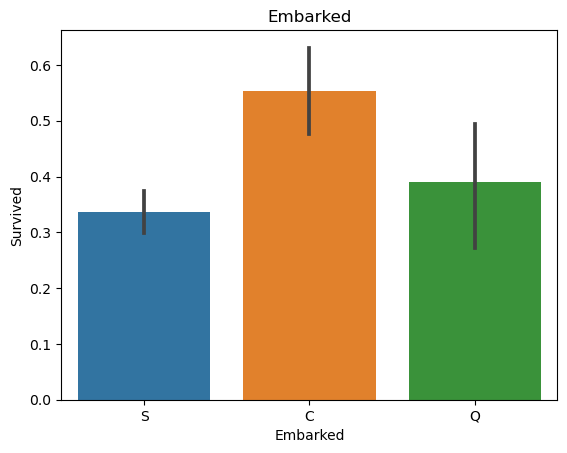

In [79]:
for i in titanic_cat.columns:
    sns.barplot(data=titanic,x=titanic_cat[i],y='Survived')
    plt.title(i)
    plt.show()


In [50]:
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Step 4: Feature Engineering

In [51]:
titanic_cat.Cabin
titanic['cabin_multiple'] = titanic.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
titanic['cabin_multiple'].value_counts()


0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [52]:
pd.pivot_table(titanic, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')


cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [53]:
# n stands for null
# in this case we will treat null values like it's own category
titanic['cabin_adv'] = titanic.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(titanic.cabin_adv.value_counts())
pd.pivot_table(titanic,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [54]:
titanic['numeric_ticket'] = titanic.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic['ticket_letters'] = titanic.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)


In [80]:
titanic.Name.head(50)
titanic['name_title'] = titanic.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
titanic['name_title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

Step 5: Data preprocessing for model

In [81]:
#Drop the null values from the Embarked column
titanic_cat.dropna(subset=['Embarked'],inplace=True)
#Include only relevant data
relevant_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"] 
titanic = titanic[relevant_columns]

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
# Define the columns that need to be transformed
categorical_columns = ["Pclass", "Sex", "Embarked", "SibSp", "Parch", "Survived"]
# Define the transformer for categorical columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])
# Define the transformer for numeric columns with missing values
numeric_columns = ["Age", "Fare"]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)])
# Fit and transform the data
transformed_data = preprocessor.fit_transform(titanic)
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [83]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,male,22.0,1,0,7.2500,S,0,2
1,1,female,38.0,1,0,71.2833,C,1,2
2,3,female,26.0,0,0,7.9250,S,1,1
3,1,female,35.0,1,0,53.1000,S,1,2
4,3,male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,1
887,1,female,19.0,0,0,30.0000,S,1,1
888,3,female,NaN,1,2,23.4500,S,0,4
889,1,male,26.0,0,0,30.0000,C,1,1


In [84]:
titanic

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,male,22.0,1,0,7.2500,S,0,2
1,1,female,38.0,1,0,71.2833,C,1,2
2,3,female,26.0,0,0,7.9250,S,1,1
3,1,female,35.0,1,0,53.1000,S,1,2
4,3,male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,1
887,1,female,19.0,0,0,30.0000,S,1,1
888,3,female,NaN,1,2,23.4500,S,0,4
889,1,male,26.0,0,0,30.0000,C,1,1


In [85]:
titanic_names = ['Sex','Embarked']
titanic=pd.get_dummies(titanic,columns=titanic_names)
titanic

,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,2,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,2,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,2,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,1,0,0,0,1
888,3,NaN,1,2,23.4500,0,4,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,1,1,0,0


In [86]:
X=titanic[['Pclass','Fare','FamilySize','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
Y=titanic['Survived']

Step 6: Model Deployment

# Logistic Regression

In [97]:
#Logistic regression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [99]:
Y_predict=lr.predict(X_test)

In [100]:
# Performance of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:\n")
accuracy_score(Y_test,Y_predict)

Accuracy:



0.7668161434977578

In [101]:
print("Confusion Matrix:\n")
confusion_matrix(Y_test,Y_predict)

Confusion Matrix:



array([[110,  17],
       [ 35,  61]], dtype=int64)

In [103]:
print("Classification Report:\n")
print(classification_report(Y_test,Y_predict))

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       127
           1       0.78      0.64      0.70        96

    accuracy                           0.77       223
   macro avg       0.77      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223



In [106]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_scaled=ss.fit_transform(X_train)



In [108]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())


[0.82835821 0.79850746 0.82089552 0.82706767 0.77443609]
0.8098529906856694


# K Nearest Neighbour

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())


[0.7761194  0.78358209 0.78358209 0.80451128 0.80451128]
0.7904612276961059


# Support Vector Classifier

In [112]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.85820896 0.79850746 0.80597015 0.82706767 0.79699248]
0.8173493435080237


Therefore the accuracy of the models are:

Logistic regression: 80.98%

K Nearest Neighbour: 79.04%

SVC: 81.73%

